# Práctica 2

## Lucas Hidalgo Herrera

Se importarán todos los paquetes generales en la siguiente celdad de código, si hay alguno necesario para un ejercicio que no se encuentre ahí, se añadirá al ejercicio.

In [154]:
import numpy as np
import sympy as sp
import importlib as ilib
import matplotlib.pyplot as plt
import derivacion_numerica as dn
import integracion_numerica as intn

### Ejercicio 1
> Pruebe ahora a repetir el mismo proceso, pero con los datos de interpolación  
> 
> a) $(a-h,f(a-h))$ y $(a,f(a))$,
> 
> b) $(a-h,f(a-h))$ y $(a+h,f(a+h))$. 
> 
> ¿Qué fórmulas de derivación numérica se obtiene en cada caso?

Procederemos de la siguiente forma, definimos los símbolos y funciones simbólicas que sean necesarias así como los valores de x que necesitemos para realizar la obtención de la fórmula.

A continuación, procederemos a obtener el polinomio de interpolación y a derivar la expresión del mismo.

In [155]:
f = sp.Function('f')                # Crea función simbólica
a,h = sp.symbols('a,h')
x_values = [a-h,a]                  # Intervalo simbólico, lista que contiene variables simbólicas
x_values

[a - h, a]

In [156]:
y_values = [f(x_values[0]),f(x_values[1])]
y_values

[f(a - h), f(a)]

In [157]:
x = sp.Symbol('x')  # utilizaremos x como variable simbólica
p = (y_values[1]-y_values[0])/(x_values[1]-x_values[0])*(x-x_values[0])+y_values[0]
p  # este sería el polinomio interpolador de grado $1$, ecuación recta tangente con derivada aproximada (f(b)-f(a))/(b-a)

f(a - h) + (f(a) - f(a - h))*(-a + h + x)/h

In [158]:
p.subs({x:x_values[0]}),p.subs({x:x_values[1]}) #  Comprobamos que el polinomio interpolador pasa por los puntos (a,f(a)) y (a+h,f(a+h))

(f(a - h), f(a))

In [159]:
sp.diff(p,x)  # Derivamos el polinomio interpolador

(f(a) - f(a - h))/h

Por tanto, nuestra fómula de interpolación es:
$$\frac{f(a)-f(a-h)}{h}$$
Es decir, la **diferencia regresiva**.

Procedemos de la misma forma con el segundo apartado.

In [160]:
x_values = [a-h,a+h]                  # Intervalo simbólico, lista que contiene variables simbólicas
x_values

[a - h, a + h]

In [161]:
y_values = [f(x_values[0]),f(x_values[1])]
y_values

[f(a - h), f(a + h)]

In [162]:
x = sp.Symbol('x')  # utilizaremos x como variable simbólica
p = (y_values[1]-y_values[0])/(x_values[1]-x_values[0])*(x-x_values[0])+y_values[0]
p  # este sería el polinomio interpolador de grado $1$, ecuación recta tangente con derivada aproximada (f(b)-f(a))/(b-a)

f(a - h) + (-f(a - h) + f(a + h))*(-a + h + x)/(2*h)

In [163]:
sp.diff(p,x)  # Derivamos el polinomio interpolador

(-f(a - h) + f(a + h))/(2*h)

Por tanto, nuestra fómula de interpolación es:
$$\frac{f(a+h)-f(a-h)}{2h}$$
Es decir, la **diferencia centrada con dos nodos**.

### Ejercicio 2
>Codifica una función para calcular la fórmula de derivación de tipo interpolatorio obtenida al derivar el polinomio interpolador en una lista de nodos que acepte como argumento. Añade un argumento opcional que sea el orden de la derivada a calcular. Comprueba el correcto funcionamiento de esta función con los ejemplos mostrados hasta el momento.

Vamos a probar la función del módulo *derivacion_numerica* con los ejemplos vistos:
- Diferencia progresiva: $x\_values=(a,a+h)$
- Diferencia regresiva: $x\_values=(a-h,a)$
- Diferencia centrada con dos nodos: $x\_values=(a-h,a+h)$
- Diferencia centrada con tres nodos: $x\_values=(a-h,a,a+h)$

In [164]:
f = sp.Function('f')                # Crea función simbólica
a,h = sp.symbols('a,h')
array_exp =[]

x_values = [a,a+h]                  # Intervalo simbólico, lista que contiene variables simbólicas
array_exp.append(dn.formulador(f,x_values,a,1))

x_values = [a-h,a]                  # Intervalo simbólico, lista que contiene variables simbólicas
array_exp.append(dn.formulador(f,x_values,a,1))

x_values = [a-h,a+h]                  # Intervalo simbólico, lista que contiene variables simbólicas
array_exp.append(dn.formulador(f,x_values,a,1))

x_values = [a-h,a,a+h]                  # Intervalo simbólico, lista que contiene variables simbólicas
array_exp.append(dn.formulador(f,x_values,a,1))

print('Diferencia progresiva: ' ,array_exp[0])
print('Diferencia regresiva: ' ,array_exp[1])
print('Diferencia centrada con dos nodos: ' ,array_exp[2])
print('Diferencia centrada con tres nodos: ' ,array_exp[3])

Diferencia progresiva:  (-f(a) + f(a + h))/h
Diferencia regresiva:  (f(a) - f(a - h))/h
Diferencia centrada con dos nodos:  (-f(a - h) + f(a + h))/(2*h)
Diferencia centrada con tres nodos:  (-f(a - h) + f(a + h))/(2*h)


Por tanto, podemos ver que la función es correcta.

### Ejercicio 3
> Repita este procedimiento con la fórmula para la segunda derivada
> $$
> f''(a) \approx  \frac{ - f{\left(a - 2 h \right)} + 16 f{\left(a - h \right)}- 30 f{\left(a \right)} + 16 f{\left(a + h \right)} - f{\left(a + 2 h \right)}}{12 h^{2}}
> $$
> e indique su orden de aproximación.

In [165]:
formula_der = lambda f: (-30*f(a)-f(a-2*h)+16*f(a-h)+16*f(a+h)-f(a+2*h))/(12*h**2) # fórmula derivada
formula_der(sp.Function('g'))

(-30*g(a) - g(a - 2*h) + 16*g(a - h) + 16*g(a + h) - g(a + 2*h))/(12*h**2)

In [166]:
exact_values =[sp.diff(x**i,x,2).subs({x:a}) for i in range(10)]    # Derivada segunda de x^i con i=0,...,9
exact_values

[0, 0, 2, 6*a, 12*a**2, 20*a**3, 30*a**4, 42*a**5, 56*a**6, 72*a**7]

In [167]:
approx_values =[formula_der(lambda x:x**i).simplify() for i in range(10)]
approx_values

[0,
 0,
 2,
 6*a,
 12*a**2,
 20*a**3,
 30*a**4 - 8*h**4,
 42*a**5 - 56*a*h**4,
 56*a**6 - 224*a**2*h**4 - 40*h**6,
 72*a**7 - 672*a**3*h**4 - 360*a*h**6]

In [168]:
np.array(approx_values) - np.array(exact_values)

#? Qué diferencia hay entra lo de la practica y esto?

array([0, 0, 0, 0, 0, 0, -8*h**4, -56*a*h**4, -224*a**2*h**4 - 40*h**6,
       -672*a**3*h**4 - 360*a*h**6], dtype=object)

In [169]:
for i in range(10):
    print(f"Diferencia entre el valor aproximado y el valor exacto de (x^{i})\'\': {approx_values[i]- exact_values[i]}")
print("comprobación terminada; deduzca de aquí el grado de exactitud de la fórmula")

Diferencia entre el valor aproximado y el valor exacto de (x^0)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^1)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^2)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^3)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^4)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^5)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^6)'': -8*h**4
Diferencia entre el valor aproximado y el valor exacto de (x^7)'': -56*a*h**4
Diferencia entre el valor aproximado y el valor exacto de (x^8)'': -224*a**2*h**4 - 40*h**6
Diferencia entre el valor aproximado y el valor exacto de (x^9)'': -672*a**3*h**4 - 360*a*h**6
comprobación terminada; deduzca de aquí el grado de exactitud de la fórmula


Hablar sobre el grado de la fórmula

In [170]:
n=5
fseries = (f(x).series(x,a,n))#.removeO()    # Series de Taylor de f(z) en el punto z=a hasta orden n-1 sin incluir O(z^5)
fseries

f(a) + (-a + x)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + (-a + x)**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)/2 + (-a + x)**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + (-a + x)**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/24 + O((-a + x)**5, (x, a))

In [171]:
fmas    = fseries.subs({x:(a+h)})           # Polin. Taylor para x=a+h
fmenos  = fseries.subs({x:(a-h)})           # Polin. Taylor para x=a-h
f2mas  = fseries.subs({x:(a+2*h)})         # Polin. Taylor para x=a+2h
f2menos= fseries.subs({x:(a-2*h)})         # Polin. Taylor para x=a-2h

In [172]:
f2menos

f(a) - 2*h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + 2*h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a) - 4*h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/3 + 2*h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/3 + O(h**5)

In [173]:
fmenos

f(a) - h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)/2 - h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/24 + O(h**5)

In [174]:
fmas

f(a) + h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)/2 + h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/24 + O(h**5)

In [175]:
f2mas

f(a) + 2*h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + 2*h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a) + 4*h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/3 + 2*h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/3 + O(h**5)

In [176]:
sp.expand((fmas + f2mas - fmenos - f2menos)/(2*h))

#! No entiendo qué tengo que hacer aquí o como conseguir la fórmula

3*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + 3*h**2*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/2 + O(h**4)

### Ejercicio 4:
> Utilice la función $f(x) = \dfrac{e^{\cos(x)}}{x^2+1}$ y el valor $a=1$ y compruebe que ocurre este mismo hecho. Repita el procedimiento utilizando la fórmula de diferencia centrada en lugar de la de diferencia progresiva y comenta las diferencias observadas.

In [177]:
f = lambda x: (sp.exp(sp.cos(x)))/(1+x**2)  # Definimos la función a evaluar

In [178]:
a = 1 # El valor exacto de la derivada de la función en este punto
vexacto = (sp.diff(f(x),x)).subs({x:a}) # sería el siguiente
vexacto.evalf()

-1.58046613519819

In [179]:
n = 30 # Calculemos aproximaciones, mediante una fórmula numérica de la derivada primera progresiva
dersnum = np.array([(f(a+10**(-j)).evalf()-f(a)).evalf()/(10**(-j)) for j in range(n+1)])
dersnum  # con h desde 10^0 hasta el valor 10^(-n).

array([-0.726346167289936, -1.46062768559165, -1.56825363261489,
       -1.57924300800925, -1.58034380417044, -1.58045390192660,
       -1.58046491170543, -1.58046601567975, -1.58046610085244,
       -1.58046629754767, -1.58046671018777, -1.58045640368950,
       -1.58049766769998, -1.57857883945304, -1.57493367932844,
       -1.87154898546997, 0.158301563928007, 1.58301563928007,
       15.8301563928007, 158.301563928007, 1583.01563928007,
       15830.1563928007, 158301.563928007, 1583015.63928007,
       15830156.3928007, 158301563.928007, 1583015639.28007,
       15830156392.8007, 158301563928.007, 1583015639280.07,
       15830156392800.7], dtype=object)

In [180]:
errores = np.array(dersnum) - vexacto.evalf()  # Aquí podemos ver una tabla
print(errores)  

[0.854119967908256 0.119838449606543 0.0122125025833022
 0.00122312718893935 0.000122331027746725 1.22332715939422e-5
 1.22349276399092e-6 1.19518437147192e-7 3.43457553508841e-8
 -1.62349478305401e-7 -5.74989583279617e-7 9.73150868910366e-6
 -3.15325017885559e-5 0.00188729574514701 0.00553245586974915
 -0.291082850271774 1.73876769912620 3.16348177447826 17.4106225279989
 159.882030063205 1584.59610541527 15831.7368589359 158303.144394142
 1583017.21974620 15830157.9732668 158301565.508473 1583015640.86054
 15830156394.3812 158301563929.587 1583015639281.65 15830156392802.3]


Concluir que cambia un poco el comportamiento porque el numerador nunca se anula -> crece y crece sin parar hasta que haya un desbordamiento.

In [181]:
[sp.N(dersnum[k],6) for k in range(n+1)]

[-0.726346,
 -1.46063,
 -1.56825,
 -1.57924,
 -1.58034,
 -1.58045,
 -1.58046,
 -1.58047,
 -1.58047,
 -1.58047,
 -1.58047,
 -1.58046,
 -1.58050,
 -1.57858,
 -1.57493,
 -1.87155,
 0.158302,
 1.58302,
 15.8302,
 158.302,
 1583.02,
 15830.2,
 158302.,
 1.58302e+6,
 1.58302e+7,
 1.58302e+8,
 1.58302e+9,
 1.58302e+10,
 1.58302e+11,
 1.58302e+12,
 1.58302e+13]

Repetimos con la diferencia centrada con dos nodos:

In [182]:
n = 30 # Calculemos aproximaciones, mediante una fórmula numérica de la derivada primera progresiva
dersnum = np.array([(f(a+10**(-j)).evalf()-f(a-10**(-j))).evalf()/(10**(-j)) for j in range(n+1)])
dersnum  # con h desde 10^0 hasta el valor 10^(-n).

array([-2.58636514597453, -3.16486806891512, -3.16097282927802,
       -3.16093267610518, -3.16093227445302, -3.16093227044067,
       -3.16093227037406, -3.16093227259451, -3.16093224927982,
       -3.16093229368875, -3.16093262675565, -3.16091597341028,
       -3.16091597341028, -3.15969472808320, -3.15303338993544,
       -3.44169137633798, -1.11022302462516, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=object)

In [183]:
errores = np.array(dersnum) - vexacto.evalf()  # Aquí podemos ver una tabla
print(errores)

[-1.00589901077634 -1.58440193371693 -1.58050669407983 -1.58046654090699
 -1.58046613925483 -1.58046613524248 -1.58046613517587 -1.58046613739632
 -1.58046611408163 -1.58046615849055 -1.58046649155746 -1.58044983821209
 -1.58044983821209 -1.57922859288500 -1.57256725473725 -1.86122524113979
 0.470243110573035 1.58046613519819 1.58046613519819 1.58046613519819
 1.58046613519819 1.58046613519819 1.58046613519819 1.58046613519819
 1.58046613519819 1.58046613519819 1.58046613519819 1.58046613519819
 1.58046613519819 1.58046613519819 1.58046613519819]


In [184]:
[sp.N(dersnum[k],6) for k in range(n+1)]

[-2.58637,
 -3.16487,
 -3.16097,
 -3.16093,
 -3.16093,
 -3.16093,
 -3.16093,
 -3.16093,
 -3.16093,
 -3.16093,
 -3.16093,
 -3.16092,
 -3.16092,
 -3.15969,
 -3.15303,
 -3.44169,
 -1.11022,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Concluir que sí que ocurre lo que buscabamos, no como antes

### Ejercicio 5 (Implementación numérica de las fórmulas de derivación)
> Implementa una función que acepte como argumentos una función en versión numérica `f`, un valor `a`, un valor `h`, y un tercer argumento que sea la fórmula de derivación numérica utilizada. La función deberá calcular la derivada de la función `f` en el punto `a` utilizando la fórmula y el valor de `h` indicados. Las posibles fórmulas utilizadas deben incluir, al menos: diferencia regresiva, diferencia progresiva, diferencia centrada y diferencia centrada con 5 nodos. Para la función $$f(x) = \sin(\log(x^2+1)),$$ calcula el valor de $f'(-1)$, primero derivando una versión simbólica y obteniendo el valor exacto y después utilizando la función implementada con distintos valores de `h` y distintas fórmulas y comprueba las diferencias en la aproximación en cada caso.

In [185]:
def f(x):
    return np.sin(np.log(x*x+1))

x=sp.Symbol('x')
g = lambda x: sp.sin(sp.log(x*x+1))

exacto=sp.diff(g(x),x).subs({x:-1}).evalf() # Derivada exacta en x=1
print(exacto)

-0.769238901363972


Obtenemos ahora la versión numérica aplicando cada una de las fórmulas:


In [186]:
n = 5 # Calculemos aproximaciones, mediante una fórmula numérica de la derivada primera progresiva
dersnum = np.array([dn.derivada_numerica(f,-1,j-1,10**(-j)) for j in range(1,n+1)])
difs=[exacto-dn.derivada_numerica(f,-1,j,10**(-j)) for j in range(n)]

print('Derivada centrada con h=0.1:' , dersnum[0]) 
print('Derivada progresiva con h=0.01:' , dersnum[1])
print('Derivada regresiva con h=0.001:' , dersnum[2])
print('Derivada centrada con tres nodos con h=0.0001:' , dersnum[3])
print('Derivada centrada con cinco nodos con h=0.00001:' , dersnum[4])

print('Diferencia entre la derivada centrada y la derivada exacta con h=0.1:' , difs[0])
print('Diferencia entre la derivada progresiva y la derivada exacta con h=0.01:' , difs[1])
print('Diferencia entre la derivada regresiva y la derivada exacta con h=0.001:' , difs[2])
print('Diferencia entre la derivada centrada con tres nodos y la derivada exacta con h=0.0001:' , difs[3])
print('Diferencia entre la derivada centrada con cinco nodos y la derivada exacta con h=0.00001:' , difs[4])

Derivada centrada con h=0.1: -0.7666700331873649
Derivada progresiva con h=0.01: -0.7724078367032594
Derivada regresiva con h=0.001: -0.7689191645420257
Derivada centrada con tres nodos con h=0.0001: -0.7692388988000953
Derivada centrada con cinco nodos con h=0.00001: -0.7692389013648955
Diferencia entre la derivada centrada y la derivada exacta con h=0.1: -0.269612147952232
Diferencia entre la derivada progresiva y la derivada exacta con h=0.01: 0.0291503616058432
Diferencia entre la derivada regresiva y la derivada exacta con h=0.001: -0.00322021888898283
Diferencia entre la derivada centrada con tres nodos y la derivada exacta con h=0.0001: -2.56413040689019e-7
Diferencia entre la derivada centrada con cinco nodos y la derivada exacta con h=0.00001: 7.38298311375729e-13


Tomar una conclusión aunque no es fácil pues no estamos en las mismas condiciones.

### Ejercicio 6
> Siguiendo el modelo y el código proporcionado para la fórmula de los rectángulos a la izquierda, codifique las fórmulas compuestas de los rectángulos a la derecha y centrados. Calcule con estas dos fórmulas la aproximación de $\displaystyle\int_0^1 (x^2+1)dx$, el error cometido con $n=1000$ y represente al menos una de las dos gráficamente.

Las funciones de integración compuesta se encuentran en el modulo *integracion_numerica*.

In [204]:
ilib.reload(intn) # Recargamos el módulo de integración numérica

def func(x):
    """función x^2+1"""
    return x*x+1

a, b = 0, 1

f = func
valor_exacto = sp.integrate(f(x),(x,a,b)) # valor exacto de la integral definida
valor_exacto.evalf()

1.33333333333333

In [207]:
valor_aproximado_dcha = intn.formula_rectangulo_derecha(f,a,b,1000) 
error_dcha = valor_exacto.evalf() - valor_aproximado_dcha
print('Valor aproximado: ', valor_aproximado_dcha)
print('Error: ', error_dcha)

Valor aproximado:  1.3338335
Error:  -0.000500166666666635


In [208]:
valor_aproximado_medio = intn.formula_rectangulo_medio(f,a,b,1000) 
error_medio = valor_exacto.evalf() - valor_aproximado_medio
print('Valor aproximado: ', valor_aproximado_medio)
print('Error: ', error_medio)

Valor aproximado:  1.333333250000001
Error:  8.33333322347585e-8


Vamos a pintar la fórmula compuesta del punto medio.

Text(0.5, 1.0, 'Fórmula compuesta de los rectángulos en el punto medio')

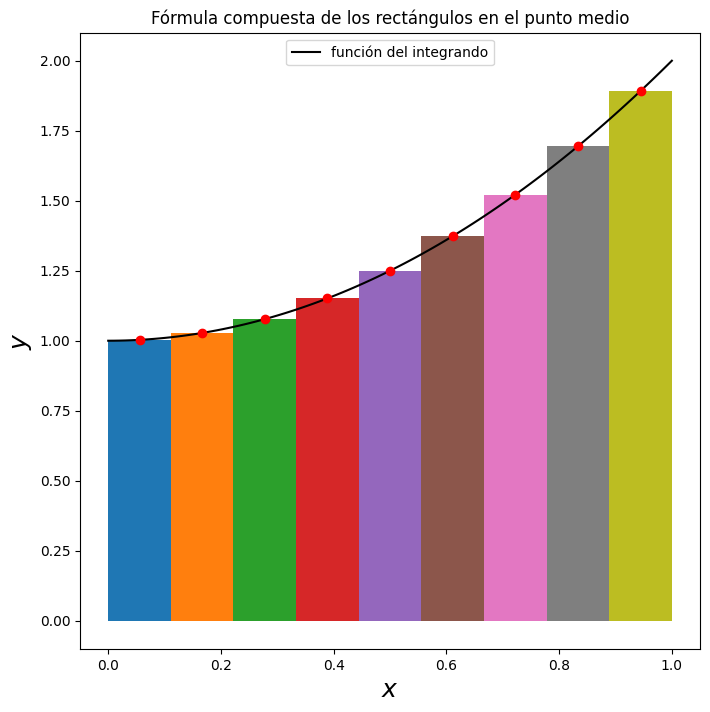

In [213]:
num_values = 100; num_nodos = 10  # Número de puntos para graficar y número de nodos de integración
x_values = np.linspace(float(a), float(b), num_values)  # Genera valores de x uniformemente distribuidos en [a, b]
y_values = f(x_values)  # Calcula los valores de la función en los puntos x
x_nodos = np.linspace(a, b, num_nodos)  # Genera los nodos de integración uniformemente distribuidos en [a, b]
y_nodos = f(x_nodos)  # Calcula los valores de la función en los nodos

fig, ax = plt.subplots(figsize=(8, 8))  # Crea una figura y un eje para graficar
ax.plot(x_values, y_values, 'k', label='función del integrando')  # Dibuja la función en negro con una etiqueta

# Rellena las áreas bajo la curva usando rectángulos basados en la fórmula del rectángulo a la izquierda
for k in range(1, num_nodos):  # Itera sobre los subintervalos definidos por los nodos
    x_izq = x_nodos[k - 1]
    x_der = x_nodos[k]
    x_medio = (x_izq + x_der) / 2
    altura = f(x_medio)
    
    zz = np.linspace(float(x_izq), float(x_der), num_values)
    yk = [altura] * len(zz)  # Altura constante en el intervalo
    ax.fill_between(zz, 0, yk)
    
    ax.plot(x_medio, altura, 'ro')

ax.legend(loc=9)  # Añade la leyenda en la parte superior central
ax.set_xlabel('$x$', fontsize=18)  # Etiqueta del eje x
ax.set_ylabel('$y$', fontsize=18)  # Etiqueta del eje y
ax.set_title('Fórmula compuesta de los rectángulos en el punto medio')  # Título del gráfico